In [14]:
import nltk
nltk.data.find('tokenizers/punkt')
print("✅ El recurso 'punkt' está disponible.")

✅ El recurso 'punkt' está disponible.


In [15]:
import pandas as pd

# Read the CSV file from the 'data/processed' directory
df_processed = pd.read_csv('/Users/pavt/Documents/research/research-projects/active/vp-data/vp-data-extraction/data/processed/datos_capa_7.csv')

# Display the first few rows of the dataframe
df_processed.shape

(291, 1186)

In [16]:
# Eliminar filas con valores nulos en 'description'
df_processed = df_processed.dropna(subset=['description'])

# Mostrar las columnas con valores nulos
null_columns = null_counts[null_counts > 0]
print(null_columns)

df_processed

description                      36
primary_language                 21
license_name                     21
security_policy_enabled          21
vulnerability_alerts_enabled     21
stargazers_count                 21
network_count                    21
subscribers_count                21
languages                        21
dep_error                       291
dtype: int64


,repo_owner,repo_name,Number of Components,commits,branches,releases,forks,watchers,stargazers,contributors,...,desc_trigram_most_common_test_http_server,desc_trigram_most_common_tool_gener_github,desc_trigram_most_common_track_code_coverag,desc_trigram_most_common_turn_pull_request,desc_trigram_most_common_updat_commit_push,desc_trigram_most_common_updat_yaml_properti,desc_trigram_most_common_upload_aab_file,desc_trigram_most_common_use_browser_api,desc_trigram_most_common_valid_dependabot_yaml,desc_trigram_most_common_yet_anoth_upload
0,10up,action-repo-automator,50,30,3,7,4,43,18,5,...,0,0,0,0,0,0,0,0,0,0
1,1password,load-secrets-action,21,30,6,11,29,14,208,10,...,0,0,0,0,0,0,0,0,0,0
3,8398a7,action-slack,59,30,6,30,134,5,595,25,...,0,0,0,0,0,0,0,0,0,0
4,alexsim93,pull-request-analytics-action,79,30,5,30,11,3,118,4,...,0,0,0,0,0,0,0,0,0,0
5,anmol-baranwal,devtogithub,2,30,2,3,0,2,16,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,yc-actions,yc-sls-container-deploy,104,30,7,7,9,2,30,7,...,0,0,0,0,0,0,0,0,0,0
287,yogeshpaliyal,upload-indus-appstore,34,30,7,6,0,1,19,1,...,0,0,0,0,0,0,1,0,0,0
288,yuichielectric,dive-action,42,30,16,4,14,2,11,3,...,0,0,0,0,0,0,0,0,0,0
289,yuzutech,annotations-action,28,30,2,18,16,3,37,7,...,0,0,0,0,0,0,0,0,0,0


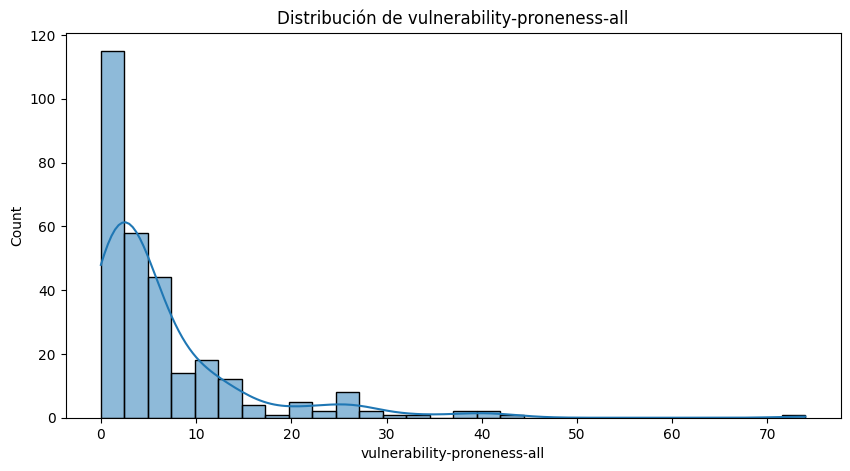

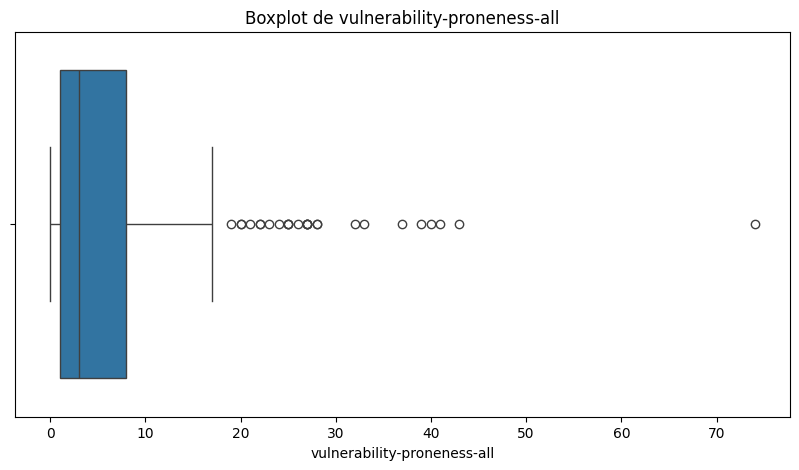

count    291.000000
mean       6.487973
std        8.877074
min        0.000000
25%        1.000000
50%        3.000000
75%        8.000000
max       74.000000
Name: vulnerability-proneness-all, dtype: float64

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv("/Users/pavt/Documents/research/research-projects/active/vp-data/vp-data-extraction/data/raw/repositories_raw_data.csv")

# Histogramas y KDE
plt.figure(figsize=(10,5))
sns.histplot(df['vulnerability-proneness-all'], kde=True, bins=30)
plt.title('Distribución de vulnerability-proneness-all')
plt.show()

# Boxplot para detectar outliers
plt.figure(figsize=(10,5))
sns.boxplot(x=df['vulnerability-proneness-all'])
plt.title('Boxplot de vulnerability-proneness-all')
plt.show()

# Descripción estadística
df['vulnerability-proneness-all'].describe()


vp-category
0    0.395189
2    0.340206
1    0.264605
Name: proportion, dtype: float64


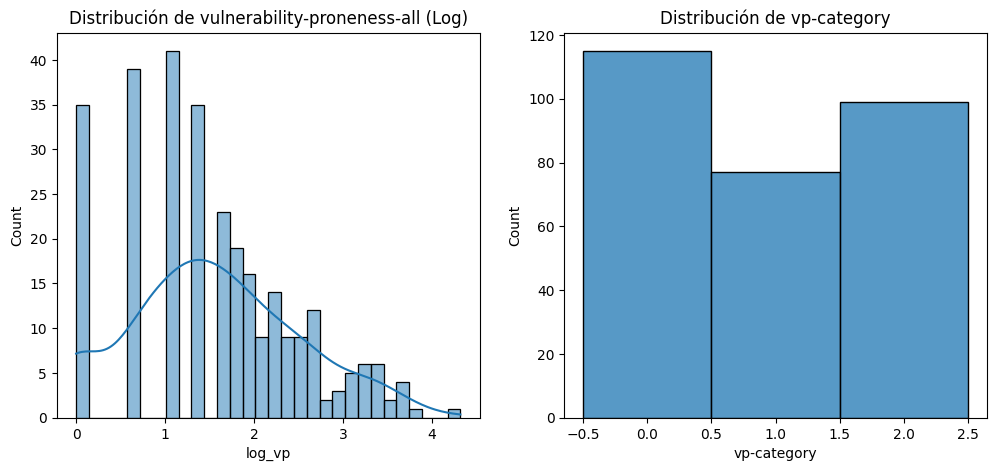

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
file_path = "datos_capa_7.csv"  # Asegúrate de usar la ruta correcta
df = pd.read_csv("/Users/pavt/Documents/research/research-projects/active/vp-data/vp-data-extraction/data/raw/repositories_raw_data.csv")

# Definir la columna de vulnerabilidad (ajustar si tiene otro nombre)
column_name = "vulnerability-proneness-all"  # Cambiar si el nombre es diferente

if column_name in df.columns:
    # Remover valores nulos para evitar problemas
    df = df.dropna(subset=[column_name])

    # Aplicar transformación logarítmica (log1p evita log(0))
    df["log_vp"] = np.log1p(df[column_name])

    # Calcular cuantiles para discretización en 3 categorías
    low_q = df["log_vp"].quantile(0.33)
    high_q = df["log_vp"].quantile(0.66)

    # Asignar categorías: 0 (Low), 1 (Medium), 2 (High)
    df["vp-category"] = pd.cut(df["log_vp"], bins=[-np.inf, low_q, high_q, np.inf], labels=[0, 1, 2])

    # Mostrar distribución resultante
    print(df["vp-category"].value_counts(normalize=True))

    # Graficar la distribución después de la transformación
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.histplot(df["log_vp"], kde=True, bins=30, ax=axes[0])
    axes[0].set_title("Distribución de vulnerability-proneness-all (Log)")

    sns.histplot(df["vp-category"], discrete=True, ax=axes[1])
    axes[1].set_title("Distribución de vp-category")

    plt.show()

else:
    print(f"La columna '{column_name}' no se encuentra en el dataset.")


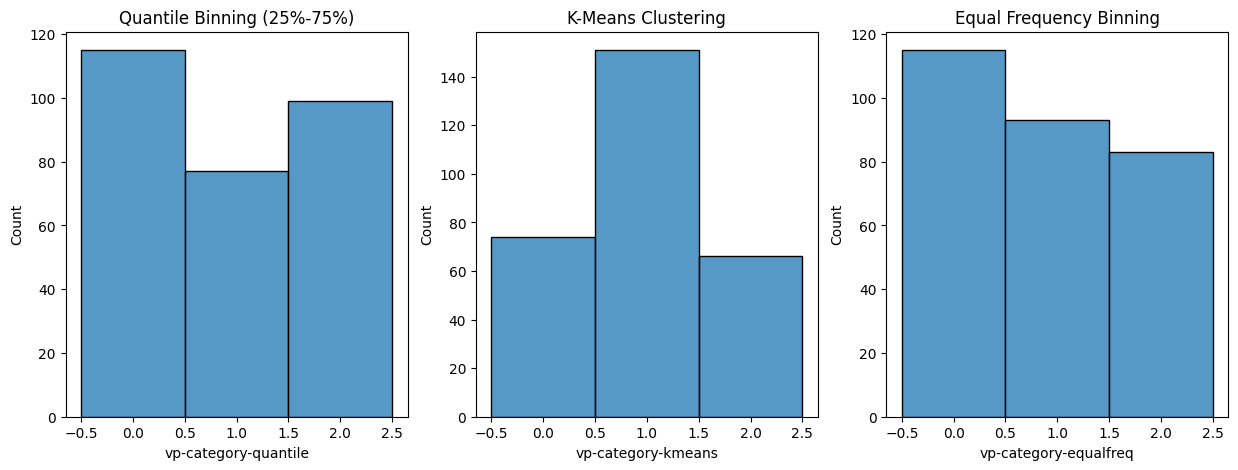

In [26]:
from sklearn.cluster import KMeans

# Copia del dataframe para pruebas
df_temp = df.copy()

# Aplicar transformación logarítmica
df_temp["log_vp"] = np.log1p(df_temp["vulnerability-proneness-all"])

# Método 1: Quantile Binning ajustado (25%-75%)
low_q = df_temp["log_vp"].quantile(0.33)
high_q = df_temp["log_vp"].quantile(0.66)

df_temp["vp-category-quantile"] = pd.cut(df_temp["log_vp"],
                                         bins=[-np.inf, low_q, high_q, np.inf],
                                         labels=[0, 1, 2])

# Método 2: K-Means Clustering en datos transformados
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_temp["vp-category-kmeans"] = kmeans.fit_predict(df_temp[["log_vp"]])

# Método 3: Equal Frequency Binning (Discretización con igual cantidad de muestras)
df_temp["vp-category-equalfreq"] = pd.qcut(df_temp["log_vp"], q=3, labels=[0, 1, 2])

# Comparar distribuciones
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df_temp["vp-category-quantile"], discrete=True, ax=axes[0])
axes[0].set_title("Quantile Binning (25%-75%)")

sns.histplot(df_temp["vp-category-kmeans"], discrete=True, ax=axes[1])
axes[1].set_title("K-Means Clustering")

sns.histplot(df_temp["vp-category-equalfreq"], discrete=True, ax=axes[2])
axes[2].set_title("Equal Frequency Binning")

plt.show()

# Mostrar distribución en números
df_distribution = pd.DataFrame({
    "Quantile Binning (25%-75%)": df_temp["vp-category-quantile"].value_counts(normalize=True),
    "K-Means Clustering": df_temp["vp-category-kmeans"].value_counts(normalize=True),
    "Equal Frequency Binning": df_temp["vp-category-equalfreq"].value_counts(normalize=True),
})
 